In [2]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [3]:
fname = "2020_11_5.hdf"
dset_name = "1604610377 RC ratio with R0 F1 and RC P2 F1"

devices = ("Seed1Amplifier", "Laser")

In [4]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)
attr_name = 'Seed1Amplifier SetCurrentGUI'

In [5]:
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pmt_data -= pmt_data[:,150:250].mean(axis = 1)[:, np.newaxis]

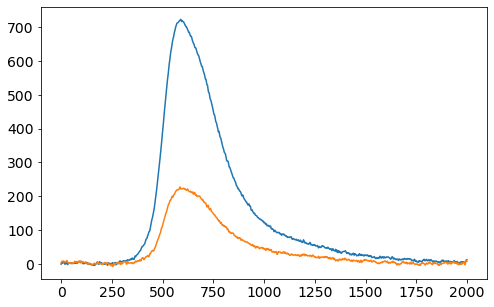

In [6]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(pmt_data[1::2].mean(axis = 0))
ax.plot(pmt_data[::2].mean(axis = 0))

set_fontsize(ax, 14)

In [8]:
np.trapz(pmt_data[1::2].mean(axis = 0)[200:])/np.trapz(pmt_data[::2].mean(axis = 0)[200:])

3.1091970200063024